# Importing necessary libraries and data fetching

In [1]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

In [2]:
# importing classifiers and training utils
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/EC3M2/datasets/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/EC3M2/datasets/test.csv')


# Data Processing

## Data Cleaning

In [7]:
df_train.head(10)

id                                              title  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2   2                  Why the Truth Might Get You Fired   
3   3  15 Civilians Killed In Single US Airstrike Hav...   
4   4  Iranian woman jailed for fictional unpublished...   
5   5  Jackie Mason: Hollywood Would Love Trump if He...   
6   6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7   7  Benoît Hamon Wins French Socialist Party’s Pre...   
8   8  Excerpts From a Draft Script for Donald Trump’...   
9   9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                           NaN   
7               Alissa J. Rubin   
8                           NaN   
9  Megan Twohey and Scott Shane   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
5  In these trying times, Jackie Mason is the Voi...      0  
6  Ever wonder how Britain’s most iconic pop pian...      1  
7  PARIS  —   France chose an idealistic, traditi...      0  
8  Donald J. Trump is scheduled to make a highly ...      0  
9  A week before Michael T. Flynn resigned as nat...      0

In [8]:
df_test.head(10)

id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   
5  20805  Trump is USA's antique hero. Clinton will be n...   
6  20806  Pelosi Calls for FBI Investigation to Find Out...   
7  20807            Weekly Featured Profile – Randy Shannon   
8  20808  Urban Population Booms Will Make Climate Chang...   
9  20809                                                NaN   

                    author                                               text  
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...  
1                      NaN  Russian warships ready to strike terrorists ne...  
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...  
3            Daniel Victor  If at first you don’t succeed, try a different...  
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
5                      NaN  Trump is USA's antique hero. Clinton will be n...  
6                  Pam Key  Sunday on NBC’s “Meet the Press,” House Minori...  
7            Trevor Loudon  You are here: Home / *Articles of the Bound* /...  
8                      NaN  Urban Population Booms Will Make Climate Chang...  
9      cognitive dissident                         don't we have the receipt?

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
#removing null values
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df_train=df_train.fillna(" ")

In [12]:
df_train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [14]:
#removing unwanted columns
df_train.drop(columns = 'id',axis=1,inplace=True)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20800 non-null  object
 1   author  20800 non-null  object
 2   text    20800 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


## Data Preprocessing

In [16]:
#merging columns
df_train['news']=df_train['author']+':'+df_train['title']

In [17]:
df_train.head(10)

title  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                  Why the Truth Might Get You Fired   
3  15 Civilians Killed In Single US Airstrike Hav...   
4  Iranian woman jailed for fictional unpublished...   
5  Jackie Mason: Hollywood Would Love Trump if He...   
6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7  Benoît Hamon Wins French Socialist Party’s Pre...   
8  Excerpts From a Draft Script for Donald Trump’...   
9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                                 
7               Alissa J. Rubin   
8                                 
9  Megan Twohey and Scott Shane   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   
5  In these trying times, Jackie Mason is the Voi...      0   
6  Ever wonder how Britain’s most iconic pop pian...      1   
7  PARIS  —   France chose an idealistic, traditi...      0   
8  Donald J. Trump is scheduled to make a highly ...      0   
9  A week before Michael T. Flynn resigned as nat...      0   

                                                news  
0  Darrell Lucus:House Dem Aide: We Didn’t Even S...  
1  Daniel J. Flynn:FLYNN: Hillary Clinton, Big Wo...  
2  Consortiumnews.com:Why the Truth Might Get You...  
3  Jessica Purkiss:15 Civilians Killed In Single ...  
4  Howard Portnoy:Iranian woman jailed for fictio...  
5  Daniel Nussbaum:Jackie Mason: Hollywood Would ...  
6   :Life: Life Of Luxury: Elton John’s 6 Favorit...  
7  Alissa J. Rubin:Benoît Hamon Wins French Socia...  
8   :Excerpts From a Draft Script for Donald Trum...  
9  Megan Twohey and Scott Shane:A Back-Channel Pl...

In [18]:
# df_train.drop(columns = ['text','author'],axis=1,inplace=True)

In [19]:
df_train.head(10)

title  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                  Why the Truth Might Get You Fired   
3  15 Civilians Killed In Single US Airstrike Hav...   
4  Iranian woman jailed for fictional unpublished...   
5  Jackie Mason: Hollywood Would Love Trump if He...   
6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7  Benoît Hamon Wins French Socialist Party’s Pre...   
8  Excerpts From a Draft Script for Donald Trump’...   
9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                                 
7               Alissa J. Rubin   
8                                 
9  Megan Twohey and Scott Shane   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   
5  In these trying times, Jackie Mason is the Voi...      0   
6  Ever wonder how Britain’s most iconic pop pian...      1   
7  PARIS  —   France chose an idealistic, traditi...      0   
8  Donald J. Trump is scheduled to make a highly ...      0   
9  A week before Michael T. Flynn resigned as nat...      0   

                                                news  
0  Darrell Lucus:House Dem Aide: We Didn’t Even S...  
1  Daniel J. Flynn:FLYNN: Hillary Clinton, Big Wo...  
2  Consortiumnews.com:Why the Truth Might Get You...  
3  Jessica Purkiss:15 Civilians Killed In Single ...  
4  Howard Portnoy:Iranian woman jailed for fictio...  
5  Daniel Nussbaum:Jackie Mason: Hollywood Would ...  
6   :Life: Life Of Luxury: Elton John’s 6 Favorit...  
7  Alissa J. Rubin:Benoît Hamon Wins French Socia...  
8   :Excerpts From a Draft Script for Donald Trum...  
9  Megan Twohey and Scott Shane:A Back-Channel Pl...

In [20]:
## training on author + text data
df_train['newstext'] = df_train['author'] + ' : ' + df_train['text']

In [21]:
X_text, Y_text = df_train['newstext'].values, df_train['label'].values

In [22]:
X = df_train['news'].values
Y = df_train['label'].values

In [23]:
type(df_train['news'].values)

numpy.ndarray

## Data Visualization

In [24]:
print(X)

['Darrell Lucus:House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'
 'Daniel J. Flynn:FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
 'Consortiumnews.com:Why the Truth Might Get You Fired' ...
 'Michael J. de la Merced and Rachel Abrams:Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times'
 'Alex Ansary:NATO, Russia To Hold Parallel Exercises In Balkans'
 'David Swanson:What Keeps the F-35 Alive']


In [25]:
print(Y)

[1 0 1 ... 0 1 1]


In [26]:
X.shape

(20800,)

In [27]:
Y.shape

(20800,)

In [28]:
wordcloud = WordCloud(width = 3000, height=2000,background_color = 'white').generate(" ".join(df_train['news']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k'
)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [29]:
wordcloud = WordCloud(width = 3000, height=2000,background_color = 'white').generate(" ".join(df_train['newstext']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k'
)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Word Embeddings : Count Vectorization

In [30]:
vectorizer = CountVectorizer()

vectorizer.fit(X)

CountVectorizer()

In [31]:
vectorizer_text = CountVectorizer()

In [32]:
X_text = vectorizer_text.fit_transform(X_text)

In [33]:
type(X)

numpy.ndarray

In [34]:
X=vectorizer.transform(X)

In [35]:
print(X)

  (0, 904)	1
  (0, 3862)	1
  (0, 4507)	1
  (0, 5508)	1
  (0, 5800)	1
  (0, 6145)	1
  (0, 7574)	1
  (0, 10387)	1
  (0, 11307)	1
  (0, 11409)	1
  (0, 12528)	1
  (0, 12902)	1
  (0, 19171)	1
  (0, 22289)	1
  (0, 22649)	1
  (0, 23355)	1
  (1, 2544)	1
  (1, 3075)	1
  (1, 3509)	1
  (1, 4298)	1
  (1, 5469)	1
  (1, 8420)	2
  (1, 10134)	1
  (1, 15149)	1
  (1, 23748)	1
  :	:
  (20797, 17253)	1
  (20797, 17550)	1
  (20797, 18720)	1
  (20797, 21266)	1
  (20797, 21564)	1
  (20797, 21736)	1
  (20797, 21775)	1
  (20797, 23989)	1
  (20798, 1009)	1
  (20798, 1324)	1
  (20798, 2068)	1
  (20798, 7676)	1
  (20798, 10228)	1
  (20798, 10764)	1
  (20798, 14500)	1
  (20798, 15626)	1
  (20798, 18626)	1
  (20798, 21775)	1
  (20799, 270)	1
  (20799, 1043)	1
  (20799, 5537)	1
  (20799, 11815)	1
  (20799, 21101)	1
  (20799, 21564)	1
  (20799, 23493)	1


## Data Splitting for training and validation

In [36]:
# splitting the data to train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [37]:
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(X_text, Y_text, test_size=0.2)

# Model Training & Evaluation

- model
- score
- confusion matrix
- classification report
- ROC Curve
- export

## Logistic Regression


In [38]:
# model - logistic regression
regressor=LogisticRegression()
regressor.fit(X_train,Y_train)

LogisticRegression()

In [39]:
regressor.score(X_test,Y_test)

0.9920673076923077

In [40]:
lr_predict = regressor.predict(X_test)

In [41]:
accuracy_score(lr_predict,Y_test)

0.9920673076923077

In [42]:
X_new = X_test[150]


prediction = regressor.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[0]
The news is Real


In [45]:
print(confusion_matrix(Y_test,lr_predict))

[[1996   29]
 [   4 2131]]


In [46]:
# exporting the model
os.mkdir("./models")
filename='./models/logreg.sav'
pickle.dump(regressor,open(filename,'wb'))

In [47]:
loaded_model=pickle.load(open('./models/logreg.sav','rb'))

In [48]:
# saving the vectorizer
os.mkdir("./vectorizer")
filename='./vectorizer/author_title.sav'
pickle.dump(vectorizer,open(filename,'wb'))

In [49]:
loaded_vectorizer = pickle.load(open('./vectorizer/author_title.sav','rb'))

In [50]:
X_new = X_test[150]
print(type(X_new))
prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

<class 'scipy.sparse._csr.csr_matrix'>
[0]
The news is Real


In [51]:
X_new=['Biden, a Democrat from Delaware who previously served as vice president under Barack Obama, took office following his victory in the 2020 presidential election over Republican incumbent president Donald Trump. Upon his inauguration, he became the oldest president in American history.']

In [52]:
type(X_new)

list

In [53]:

X_new=loaded_vectorizer.transform(X_new)
type(X_new)

scipy.sparse._csr.csr_matrix

In [54]:
prediction = loaded_model.predict(X_new)

In [55]:
if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

The news is Real


In [56]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])

prediction = loaded_model.predict(inp)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

The news is Fake


In [57]:
logreg_text = LogisticRegression(max_iter=1000)

In [58]:
logreg_text.fit(X_text_train, Y_text_train)

LogisticRegression(max_iter=1000)

In [59]:
logreg_text.score(X_text_test, Y_text_test)

0.965625

In [60]:
# export new model
pickle.dump(logreg_text, open('./models/logreg_text.sav','wb'))

In [61]:
#export new vectorizer
pickle.dump(vectorizer_text, open('./vectorizer/author_text.sav','wb'))

In [62]:
# now load the saved models for testing
loaded_text_model = pickle.load(open('./models/logreg_text.sav','rb'))
loaded_text_vectorizer = pickle.load(open('./vectorizer/author_text.sav','rb'))

In [63]:
loaded_text_model.predict(X_text_test[120]) == Y_text_test[120]

array([ True])

In [64]:
print("classification report of logistic regression: \n\n",classification_report(Y_test, lr_predict))

classification report of logistic regression: 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2025
           1       0.99      1.00      0.99      2135

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [65]:
print("Confusion matrix of logistic regreesion with text: \n", confusion_matrix(Y_text_test,loaded_text_model.predict(X_text_test)))

Confusion matrix of logistic regreesion with text: 
 [[2035   95]
 [  48 1982]]


In [66]:
print("classification report of logistic regression with text : \n\n",classification_report(Y_text_test, logreg_text.predict(X_text_test)))

classification report of logistic regression with text : 

               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2130
           1       0.95      0.98      0.97      2030

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



Text(0.5, 1.0, 'logistic regression')

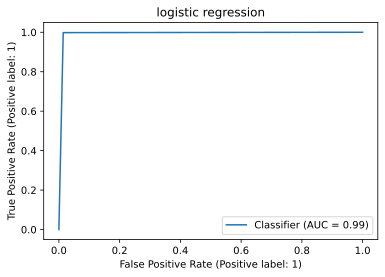

In [67]:
RocCurveDisplay.from_predictions(Y_test, lr_predict)
plt.title("logistic regression")

Text(0.5, 1.0, 'logistic regression with text')

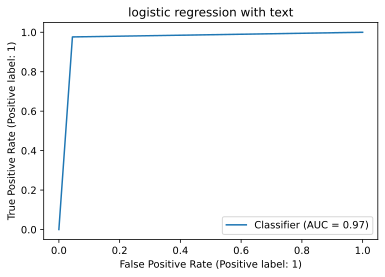

In [68]:
RocCurveDisplay.from_predictions(Y_text_test, logreg_text.predict(X_text_test))
plt.title("logistic regression with text")

## Decision Tree

In [69]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
tree.score(X_test, Y_test)

0.99375

In [70]:
tree_text = DecisionTreeClassifier()
tree_text.fit(X_text_train, Y_text_train)
tree_text.score(X_text_test, Y_text_test)

0.9144230769230769

In [71]:
# exporting models
filename='./models/tree.sav'
pickle.dump(tree,open(filename,'wb'))
pickle.dump(tree_text, open('./models/tree_text.sav','wb'))

In [72]:
loaded_tree=pickle.load(open('./models/tree.sav','rb'))
loaded_text_tree = pickle.load(open('./models/tree_text.sav','rb'))

In [73]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])

In [74]:
loaded_tree.predict(inp)

array([1])

In [75]:
loaded_text_tree.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 1])

In [76]:
print("Tree:")
print(confusion_matrix(Y_test, loaded_tree.predict(X_test)))
print("Tree with text data:")
print(confusion_matrix(Y_text_test, loaded_text_tree.predict(X_text_test)))

Tree:
[[2009   16]
 [  10 2125]]
Tree with text data:
[[1930  200]
 [ 156 1874]]


In [77]:
# comparision reports
print("Classification report of tree:\n\n", classification_report(Y_test, loaded_tree.predict(X_test)))
print("\n")
print("Classification report of tree with text:\n\n", classification_report(Y_text_test, loaded_text_tree.predict(X_text_test)))

Classification report of tree:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2025
           1       0.99      1.00      0.99      2135

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



Classification report of tree with text:

               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2130
           1       0.90      0.92      0.91      2030

    accuracy                           0.91      4160
   macro avg       0.91      0.91      0.91      4160
weighted avg       0.91      0.91      0.91      4160



Text(0.5, 1.0, 'Tree')

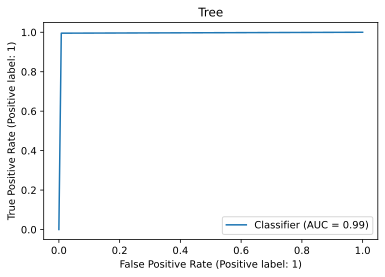

In [78]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_tree.predict(X_test))
plt.title("Tree")

Text(0.5, 1.0, 'Tree with text')

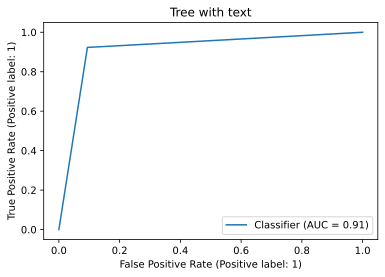

In [79]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_tree.predict(X_text_test))
plt.title("Tree with text")

## KNN

In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.8225961538461538

In [81]:
knn_text = KNeighborsClassifier()
knn_text.fit(X_text_train, Y_text_train)
knn_text.score(X_text_test, Y_text_test)

0.8401442307692307

In [82]:
# exporting models
filename='./models/knn.sav'
pickle.dump(knn,open(filename,'wb'))
pickle.dump(knn_text, open('./models/knn_text.sav','wb'))

In [83]:
loaded_knn=pickle.load(open('./models/knn.sav','rb'))
loaded_text_knn = pickle.load(open('./models/knn_text.sav','rb'))

In [84]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])
loaded_knn.predict(inp)

array([1])

In [85]:
loaded_text_knn.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 1])

In [86]:
print("KNN:")
print(confusion_matrix(Y_test, loaded_knn.predict(X_test)))
print("KNN with text data:")
print(confusion_matrix(Y_text_test, loaded_text_knn.predict(X_text_test)))

KNN:
[[1287  738]
 [   0 2135]]
KNN with text data:
[[1680  450]
 [ 215 1815]]


In [87]:
# comparision reports
print("Classification report of KNN:\n\n", classification_report(Y_test, loaded_knn.predict(X_test)))
print("\n")
print("Classification report of KNN with text:\n\n", classification_report(Y_text_test, loaded_text_knn.predict(X_text_test)))

Classification report of KNN:

               precision    recall  f1-score   support

           0       1.00      0.64      0.78      2025
           1       0.74      1.00      0.85      2135

    accuracy                           0.82      4160
   macro avg       0.87      0.82      0.81      4160
weighted avg       0.87      0.82      0.82      4160



Classification report of KNN with text:

               precision    recall  f1-score   support

           0       0.89      0.79      0.83      2130
           1       0.80      0.89      0.85      2030

    accuracy                           0.84      4160
   macro avg       0.84      0.84      0.84      4160
weighted avg       0.84      0.84      0.84      4160



Text(0.5, 1.0, 'KNN')

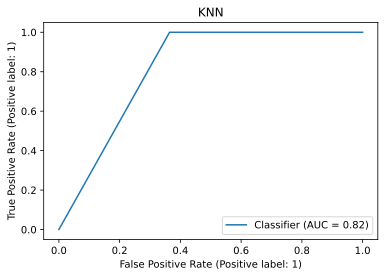

In [88]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_knn.predict(X_test))
plt.title("KNN")

Text(0.5, 1.0, 'KNN with text')

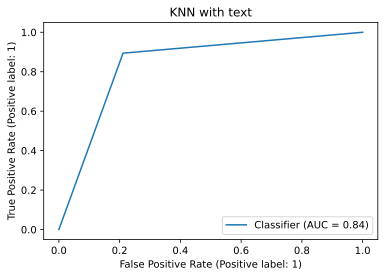

In [89]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_knn.predict(X_text_test))
plt.title("KNN with text")

## Naïve Bayes

In [90]:
NB = BernoulliNB()
NB.fit(X_train, Y_train)
NB.score(X_test, Y_test)

0.9819711538461539

In [91]:
NB_text = BernoulliNB()
NB_text.fit(X_text_train, Y_text_train)
NB_text.score(X_text_test, Y_text_test)

0.770673076923077

In [92]:
# exporting models
filename='./models/NB.sav'
pickle.dump(knn,open(filename,'wb'))
pickle.dump(knn_text, open('./models/NB_text.sav','wb'))

In [93]:
loaded_NB = pickle.load(open('./models/NB.sav','rb'))
loaded_text_NB = pickle.load(open('./models/NB_text.sav','rb'))

In [94]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])
loaded_NB.predict(inp)

array([1])

In [95]:
loaded_text_NB.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 1])

In [96]:
print("Naïve Bayes:")
print(confusion_matrix(Y_test, loaded_NB.predict(X_test)))
print("Naïve Bayes with text data:")
print(confusion_matrix(Y_text_test, loaded_text_NB.predict(X_text_test)))

Naïve Bayes:
[[1287  738]
 [   0 2135]]
Naïve Bayes with text data:
[[1680  450]
 [ 215 1815]]


In [97]:
# comparision reports
print("Classification report of Naïve Bayes:\n\n", classification_report(Y_test, loaded_NB.predict(X_test)))
print("\n")
print("Classification report of Naïve Bayes with text:\n\n", classification_report(Y_text_test, loaded_text_NB.predict(X_text_test)))

Classification report of Naïve Bayes:

               precision    recall  f1-score   support

           0       1.00      0.64      0.78      2025
           1       0.74      1.00      0.85      2135

    accuracy                           0.82      4160
   macro avg       0.87      0.82      0.81      4160
weighted avg       0.87      0.82      0.82      4160



Classification report of Naïve Bayes with text:

               precision    recall  f1-score   support

           0       0.89      0.79      0.83      2130
           1       0.80      0.89      0.85      2030

    accuracy                           0.84      4160
   macro avg       0.84      0.84      0.84      4160
weighted avg       0.84      0.84      0.84      4160



Text(0.5, 1.0, 'Naïve Bayes')

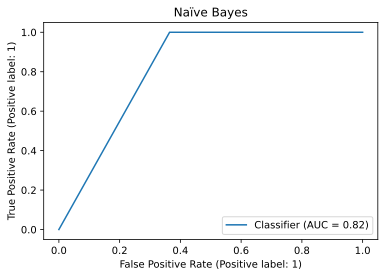

In [98]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_NB.predict(X_test))
plt.title("Naïve Bayes")

Text(0.5, 1.0, 'Naïve Bayes with text')

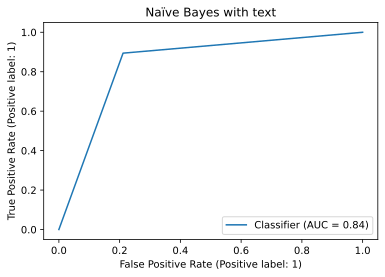

In [99]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_NB.predict(X_text_test))
plt.title("Naïve Bayes with text")

## SVM

In [100]:
SVM = SVC()
SVM.fit(X_train, Y_train)
SVM.score(X_test, Y_test)

0.9901442307692307

In [101]:
SVM_text = SVC()
SVM_text.fit(X_text_train, Y_text_train)
SVM_text.score(X_text_test, Y_text_test)

0.9225961538461539

In [102]:
# exporting models
filename='./models/SVM.sav'
pickle.dump(knn,open(filename,'wb'))
pickle.dump(knn_text, open('./models/SVM_text.sav','wb'))

In [103]:
loaded_SVM = pickle.load(open('./models/SVM.sav','rb'))
loaded_text_SVM = pickle.load(open('./models/SVM_text.sav','rb'))

In [104]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])
loaded_SVM.predict(inp)

array([1])

In [105]:
loaded_text_SVM.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 1])

In [106]:
print("SVM:")
print(confusion_matrix(Y_test, loaded_SVM.predict(X_test)))
print("SVM with text data:")
print(confusion_matrix(Y_text_test, loaded_text_SVM.predict(X_text_test)))

SVM:
[[1287  738]
 [   0 2135]]
SVM with text data:
[[1680  450]
 [ 215 1815]]


In [107]:
# comparision reports
print("Classification report of SVM:\n\n", classification_report(Y_test, loaded_SVM.predict(X_test)))
print("\n")
print("Classification report of SVM with text:\n\n", classification_report(Y_text_test, loaded_text_SVM.predict(X_text_test)))

Classification report of SVM:

               precision    recall  f1-score   support

           0       1.00      0.64      0.78      2025
           1       0.74      1.00      0.85      2135

    accuracy                           0.82      4160
   macro avg       0.87      0.82      0.81      4160
weighted avg       0.87      0.82      0.82      4160



Classification report of SVM with text:

               precision    recall  f1-score   support

           0       0.89      0.79      0.83      2130
           1       0.80      0.89      0.85      2030

    accuracy                           0.84      4160
   macro avg       0.84      0.84      0.84      4160
weighted avg       0.84      0.84      0.84      4160



Text(0.5, 1.0, 'SVM')

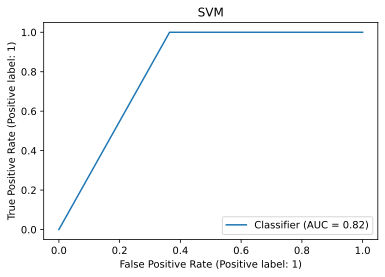

In [111]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_SVM.predict(X_test))
plt.title("SVM")

Text(0.5, 1.0, 'SVM with text')

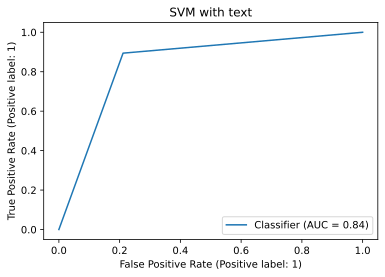

In [110]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_SVM.predict(X_text_test))
plt.title("SVM with text")

# Processing Time

In [113]:
# device
!uname -a

Linux d96c6093031d 5.10.147+ #1 SMP Sat Dec 10 16:00:40 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux


In [115]:
!sudo apt install lshw

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids pciutils usb.ids usbutils
The following NEW packages will be installed:
  libpci3 lshw pci.ids pciutils usb.ids usbutils
0 upgraded, 6 newly installed, 0 to remove and 23 not upgraded.
Need to get 820 kB of archives.
After this operation, 3,380 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 pci.ids all 0.0~2020.03.20-1 [217 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libpci3 amd64 1:3.6.4-1ubuntu0.20.04.1 [26.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 lshw amd64 02.18.85-0.3ubuntu2.20.04.1 [271 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 pciutils amd64 1:3.6.4-1ubuntu0.20.04.1 [56.5 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/main amd64 usb.ids all 2020.03.19-1 [176 kB]
Get:6 http://archive.ub

In [116]:
!sudo lshw

d96c6093031d
    description: Computer
    width: 64 bits
    capabilities: smp vsyscall32
  *-core
       description: Motherboard
       physical id: 0
     *-memory
          description: System memory
          physical id: 0
          size: 12GiB
     *-cpu
          product: Intel(R) Xeon(R) CPU @ 2.20GHz
          vendor: Intel Corp.
          physical id: 1
          bus info: cpu@0
          width: 64 bits
          capabilities: fpu fpu_exception wp vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp x86-64 constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
     *-pci
          description: Host bridge
  

In [117]:
!sudo lshw -short

H/W path    Device  Class          Description
                    system         Computer
/0                  bus            Motherboard
/0/0                memory         12GiB System memory
/0/1                processor      Intel(R) Xeon(R) CPU @ 2.20GHz
/0/100              bridge         440FX - 82441FX PMC [Natoma]
/0/100/1            bridge         82371AB/EB/MB PIIX4 ISA
/0/100/1.3          bridge         82371AB/EB/MB PIIX4 ACPI
/0/100/3            generic        Virtio SCSI
/0/100/3/0          generic        Virtual I/O device
/0/100/4            network        Virtio network device
/0/100/4/0          network        Virtual I/O device
/0/100/5            generic        Virtio memory balloon
/0/100/5/0          generic        Virtual I/O device
/0/100/6            generic        Virtio RNG
/0/100/6/0          generic        Virtual I/O device
/0/2                system         PnP device PNP0b00
/0/3                input          PnP device PNP0303
/0/4                input  

In [134]:
import time
import random
def avgTime(model:'Object',test_input:'numpy.ndarray',*, n_iters=10) -> float:
    times = np.empty((n_iters,))
    for _ in range(n_iters):
        idx = random.randint(0,200)
        start = time.time()
        model.predict(test_input[idx])
        end = time.time()
        times[_] = end - start
    print(avgtime:=np.mean(times)," s  |  ", avgtime*1000," ms  |  ", avgtime*1000000, " µs")
    return avgtime

In [135]:
# logreg - we can finetune using GridSearchCV
avgTime(loaded_model,X_test,n_iters=10)

0.0003972053527832031  s  |   0.3972053527832031  ms  |   397.2053527832031  µs


0.0003972053527832031

In [147]:
# logreg with text
avgTime(loaded_text_model, X_text_test)

0.00043976306915283203  s  |   0.43976306915283203  ms  |   439.76306915283203  µs


0.00043976306915283203

In [149]:
# Decision tree
avgTime(loaded_tree,X_test,n_iters=10)
# Decision Tree with text
avgTime(loaded_text_tree, X_text_test)

0.0005131006240844726  s  |   0.5131006240844727  ms  |   513.1006240844727  µs
0.0005401372909545898  s  |   0.5401372909545898  ms  |   540.1372909545898  µs


0.0005401372909545898

In [154]:
# KNN
avgTime(loaded_knn,X_test,n_iters=10)
# KNN with text
avgTime(loaded_text_knn, X_text_test)

0.005048894882202148  s  |   5.048894882202148  ms  |   5048.894882202148  µs
0.15187408924102783  s  |   151.87408924102783  ms  |   151874.08924102783  µs


0.15187408924102783

In [156]:
# Naive Bayes
avgTime(loaded_NB,X_test)
# Naive Bayes with text
avgTime(loaded_text_NB, X_text_test)

0.004771304130554199  s  |   4.771304130554199  ms  |   4771.304130554199  µs
0.16091415882110596  s  |   160.91415882110596  ms  |   160914.15882110596  µs


0.16091415882110596

In [159]:
# SVM
avgTime(loaded_SVM, X_test)
# SVM with text
avgTime(loaded_text_SVM, X_text_test)

0.00459291934967041  s  |   4.59291934967041  ms  |   4592.91934967041  µs
0.16341450214385986  s  |   163.41450214385986  ms  |   163414.50214385986  µs


0.16341450214385986